In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd

file_name = next(iter(uploaded))
df = pd.read_csv(file_name)

df.head()

Saving twitter_validation.csv to twitter_validation.csv


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


In [ ]:
import re

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z ]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df[df.columns[0]].apply(clean_text)
df.head()


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣",clean_text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",
3,4433,Google,Neutral,Now the President is slapping Americans in the...,
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...,


In [ ]:
!pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.7 MB/s eta 0:00:00


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['clean_text'].apply(get_sentiment)
df[['clean_text', 'sentiment']].head()


,clean_text,sentiment
0,,Neutral
1,,Neutral
2,,Neutral
3,,Neutral
4,,Neutral


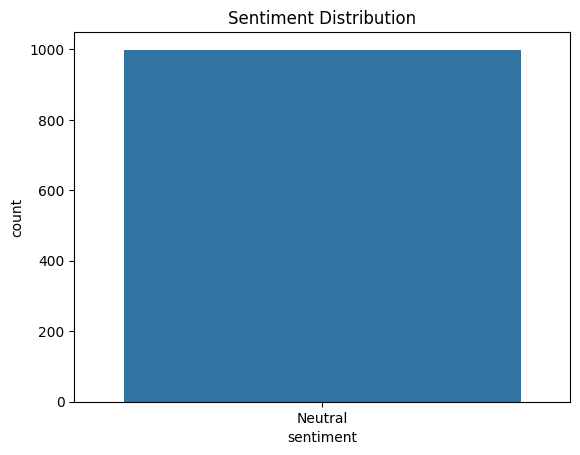

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['sentiment'])
plt.title("Sentiment Distribution")
plt.show()


In [ ]:
!pip install nrclex


INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43309 sha256=ad6974ef07a8127648c23d68cdf1cce2fa0369d1d49c869486786146ccfa93f7
  Stored in directory: /root/.cache/pip/wheels/1f/e8/d0/e3c3da0ef3b37ef4381dbf5c9401f3a9861a63ce221b13d8bb
Successfully built nrclex


In [ ]:
from nrclex import NRCLex

def get_emotions(text):
    if not text.strip():
        return None
    emotion = NRCLex(text)
    return emotion.top_emotions

df['emotions'] = df['clean_text'].apply(get_emotions)
df[['clean_text','emotions']].head()


,clean_text,emotions
0,,None
1,,None
2,,None
3,,None
4,,None


In [ ]:
df['sentiment'].value_counts(normalize=True) * 100


,proportion
sentiment,
Neutral,100.0


In [ ]:
all_emotions = df['emotions'].dropna().apply(lambda x: dict(x)).tolist()
flat_list = [item for sublist in all_emotions for item in sublist]
pd.Series(flat_list).value_counts()


,count
